# Steps

1. Import Libraries
2. Import the dataset
3. Perform Data Analysis
4. Feature Scaling
5. Encoding
6. Feature Selection
7. Choosing model
8. Split the data - CV
9. Training the model
10. Test the model
11. Performance - Confusion Matrix

# Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix

# Import Dataset

In [94]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# data analysis


In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


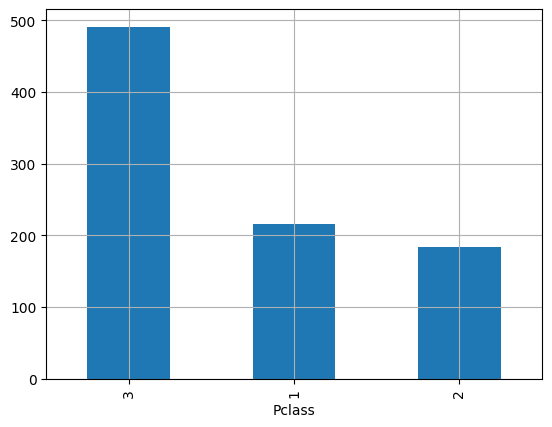

In [96]:
df.Pclass.value_counts().plot.bar(df.Pclass)
plt.grid()

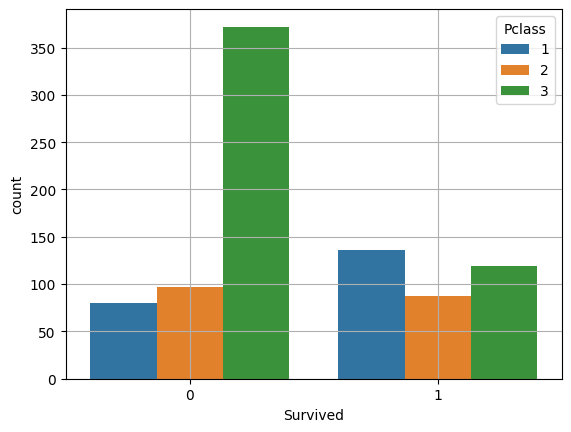

In [97]:
sns.countplot(x="Survived",data=df, hue="Pclass")
plt.grid()

# More EDA can be done - More plots, more graphs, more charts, more rate, percentages, etc.


In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [100]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [101]:
df.drop(["PassengerId"],axis=1,inplace=True)

In [102]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [103]:
df.Fare = round(df.Fare,2)

# Encoders - To convert data from the categorical form to numerical form without changing its meaning


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
enc = LabelEncoder()

In [106]:
df.Sex = enc.fit_transform(df.Sex)

In [107]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S
1,1,1,0,38.0,1,0,71.28,C
2,1,3,0,26.0,0,0,7.92,S
3,1,1,0,35.0,1,0,53.10,S
4,0,3,1,35.0,0,0,8.05,S


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [109]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [110]:
# One hot Encoding for the column Embarked
newdf = df.copy()

In [111]:
new = df.copy()

In [112]:
#newdf = pd.get_dummies(df["Embarked"])

In [113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S
1,1,1,0,38.0,1,0,71.28,C
2,1,3,0,26.0,0,0,7.92,S
3,1,1,0,35.0,1,0,53.10,S
4,0,3,1,35.0,0,0,8.05,S


In [114]:
pd.get_dummies(newdf["Embarked"])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [115]:
df = pd.concat([new, pd.get_dummies(df["Embarked"])], axis=1)

In [116]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.25,S,False,False,True
1,1,1,0,38.0,1,0,71.28,C,True,False,False
2,1,3,0,26.0,0,0,7.92,S,False,False,True
3,1,1,0,35.0,1,0,53.10,S,False,False,True
4,0,3,1,35.0,0,0,8.05,S,False,False,True


In [117]:
df.drop(["Embarked","C"],axis=1,inplace=True)

In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.25,False,True
1,1,1,0,38.0,1,0,71.28,False,False
2,1,3,0,26.0,0,0,7.92,False,True
3,1,1,0,35.0,1,0,53.10,False,True
4,0,3,1,35.0,0,0,8.05,False,True


<Axes: >

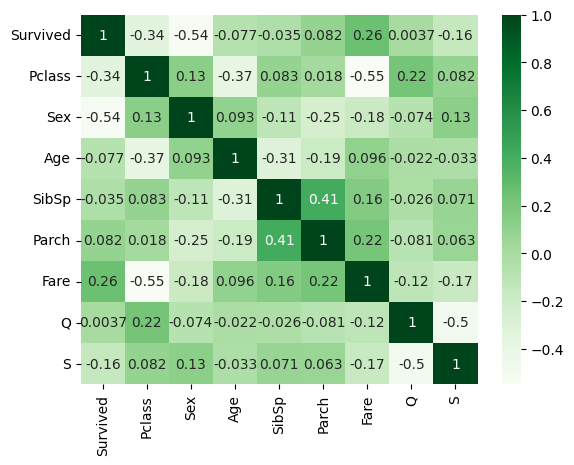

In [119]:
sns.heatmap(df.corr(),annot=True,cmap="Greens")

/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weig

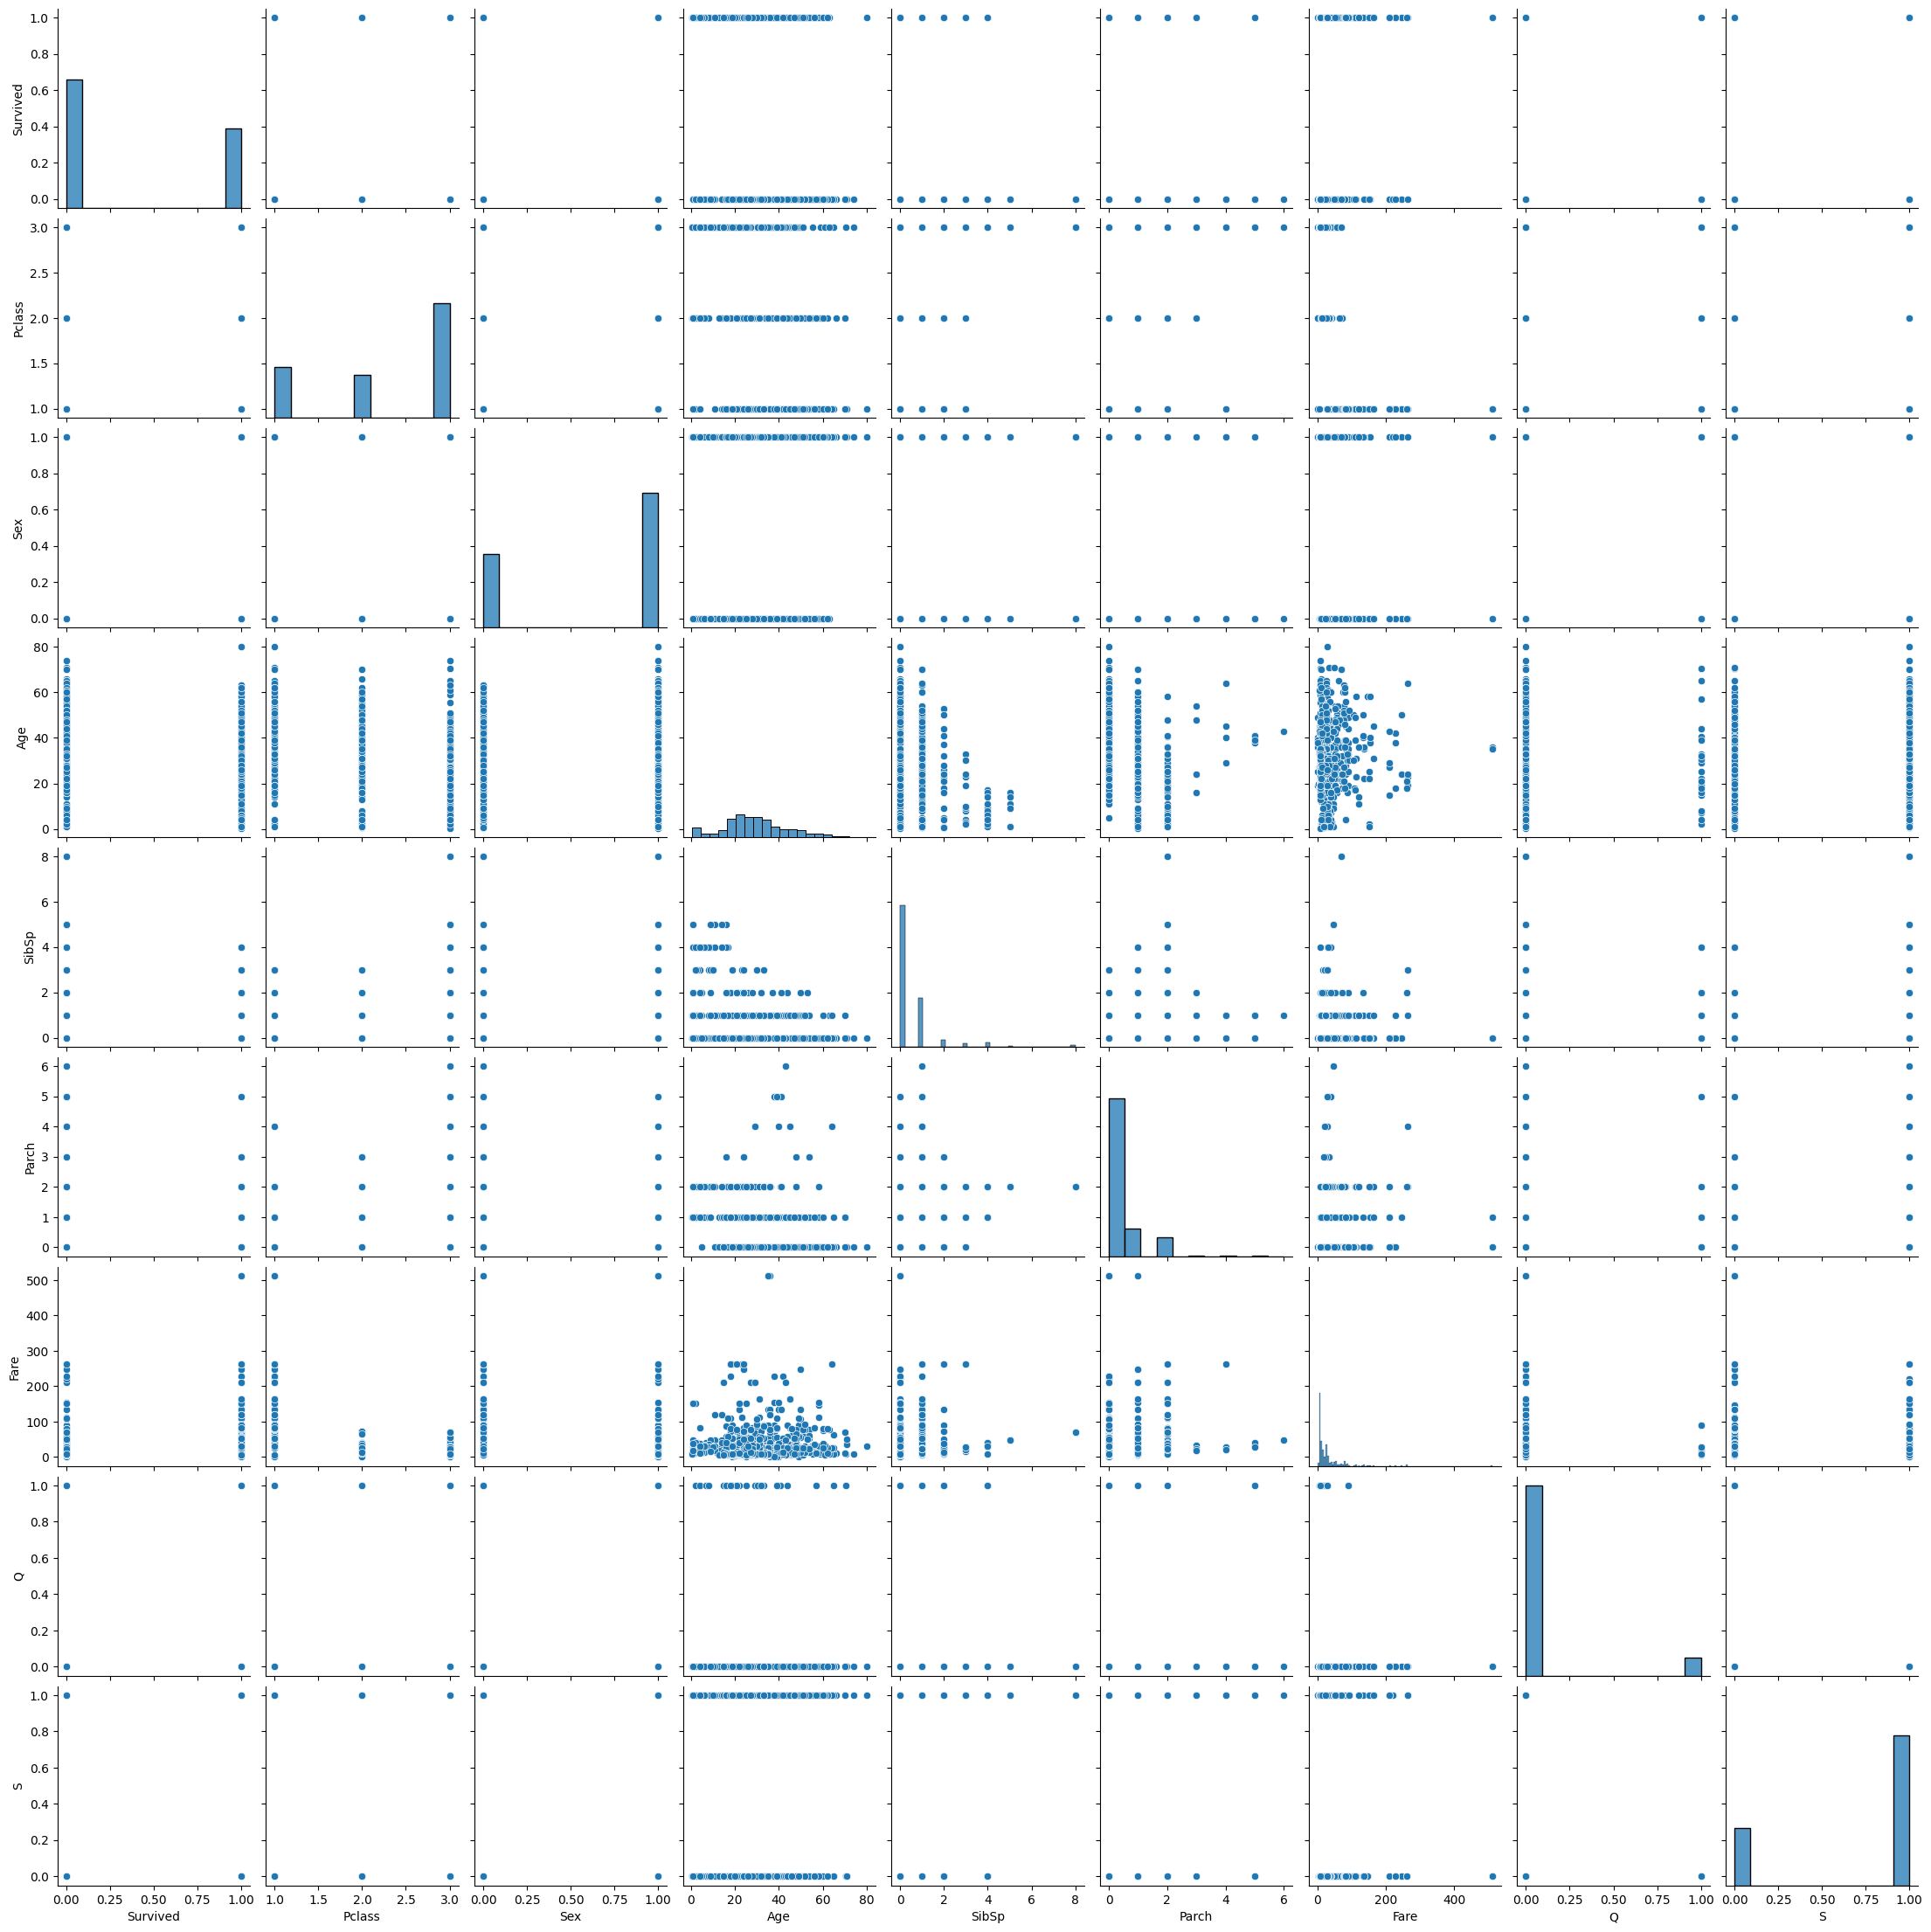

In [120]:
sns.pairplot(df)

In [121]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.25,False,True
1,1,1,0,38.0,1,0,71.28,False,False
2,1,3,0,26.0,0,0,7.92,False,True
3,1,1,0,35.0,1,0,53.10,False,True
4,0,3,1,35.0,0,0,8.05,False,True


# Feature Selection

In [122]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [123]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [124]:
x.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Q         0
S         0
dtype: int64

In [125]:
from sklearn.ensemble import ExtraTreesClassifier

In [126]:
feat = ExtraTreesClassifier()

In [127]:
feat.fit(x,y)

ExtraTreesClassifier()

In [128]:
feat.feature_importances_

array([0.10857323, 0.29020403, 0.24202486, 0.04500151, 0.04259732,
       0.24216234, 0.00892114, 0.02051556])

In [129]:
feat_imp = pd.Series(feat.feature_importances_,index=x.columns)

<Axes: >

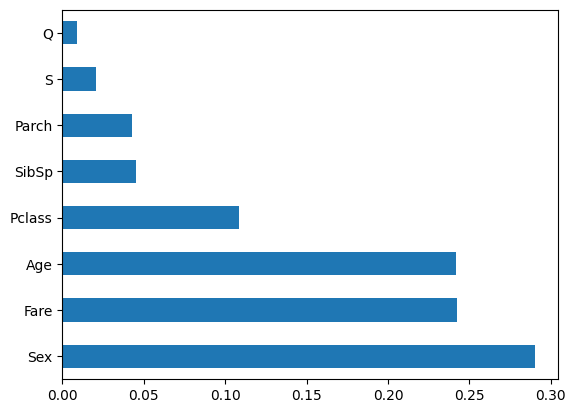

In [130]:
feat_imp.nlargest(8).plot(kind="barh")

# Splitting the data

In [131]:
from sklearn.model_selection import StratifiedKFold

In [132]:
skf = StratifiedKFold(n_splits=5)

In [133]:
for train_index, test_index in skf.split(x,y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [134]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.25,False,True
1,1,0,38.0,1,0,71.28,False,False
2,3,0,26.0,0,0,7.92,False,True
3,1,0,35.0,1,0,53.10,False,True
4,3,1,35.0,0,0,8.05,False,True
...,...,...,...,...,...,...,...,...
714,2,1,52.0,0,0,13.00,False,True
715,3,1,19.0,0,0,7.65,False,True
718,3,1,28.0,0,0,15.50,True,False
719,3,1,33.0,0,0,7.78,False,True


In [135]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
706,2,0,45.0,0,0,13.50,False,True
707,1,1,42.0,0,0,26.29,False,True
708,1,0,22.0,0,0,151.55,False,True
709,3,1,28.0,1,1,15.25,False,False
710,1,0,24.0,0,0,49.50,False,False
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.00,False,True
887,1,0,19.0,0,0,30.00,False,True
888,3,0,28.0,1,2,23.45,False,True
889,1,1,26.0,0,0,30.00,False,False


In [136]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
714    0
715    0
718    0
719    0
721    0
Name: Survived, Length: 713, dtype: int64

In [137]:
y_test

706    1
707    1
708    1
709    1
710    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 178, dtype: int64

# Model Selection

In [138]:
classifier = LogisticRegression()

# train the model

In [139]:
classifier.fit(x_train,y_train)

/Users/adityabattula/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# test model

In [140]:
y_pred = classifier.predict(x_test)

# EDA

In [141]:
final = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [142]:
final.head()

,Actual,Predicted
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


<Axes: >

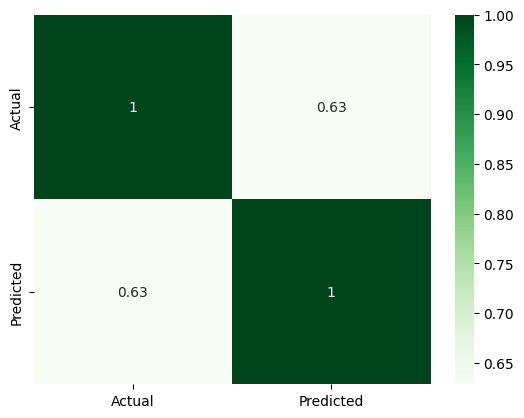

In [143]:
sns.heatmap(final.corr(), annot=True, cmap="Greens")

# Performace Matrix - Confusion matrix

In [144]:
confusion_matrix(y_test, y_pred)

array([[97, 12],
       [19, 50]])

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
accuracy_score(y_test,y_pred)

0.8258426966292135

In [145]:
from sklearn.metrics import classification_report

In [149]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86       109\n           1       0.81      0.72      0.76        69\n\n    accuracy                           0.83       178\n   macro avg       0.82      0.81      0.81       178\nweighted avg       0.82      0.83      0.82       178\n'